In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


## 1. Intensity Transformation

In [19]:
# Load grayscale image
Emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert Emma is not None

(256,)


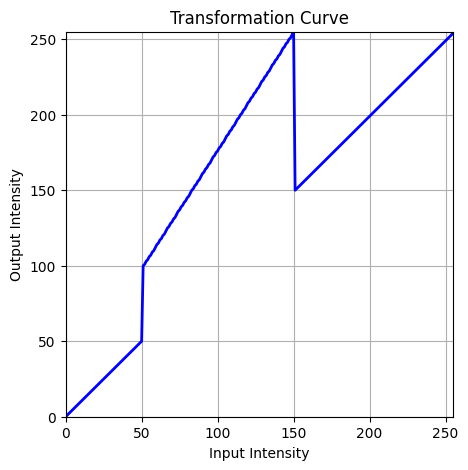

In [ ]:
# Define transformation function

# Maps input 0–50 → output 0–50
t1 = np.linspace(0, 50, num=51).astype('uint8')
# Maps input 51–150 → output 100–255
t2 = np.linspace(100, 255, num=100).astype('uint8')
# Maps input 151–255 → output 150–255
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(np.arange(256), t, color='blue', linewidth=2)
plt.title("Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True)
plt.show()

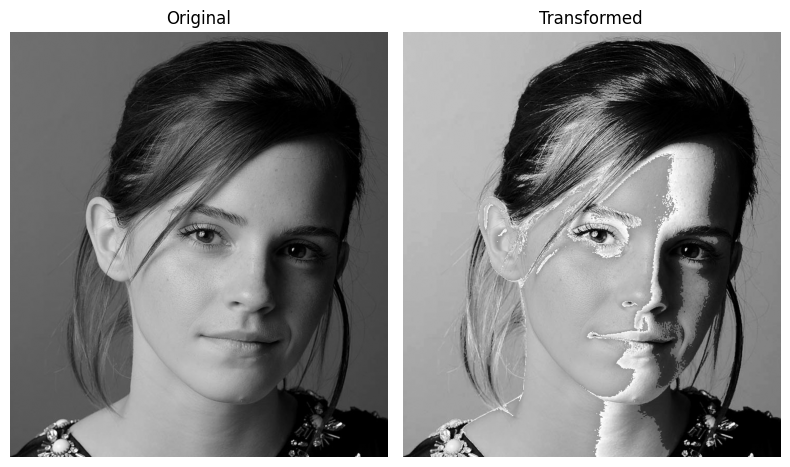

In [21]:
# Apply transformation 
g = t[Emma] # Map each pixel

# Display the image
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(Emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## 2. Intensity Transformation for a Brain Proton Density Image

In [26]:
# Load grayscale image
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

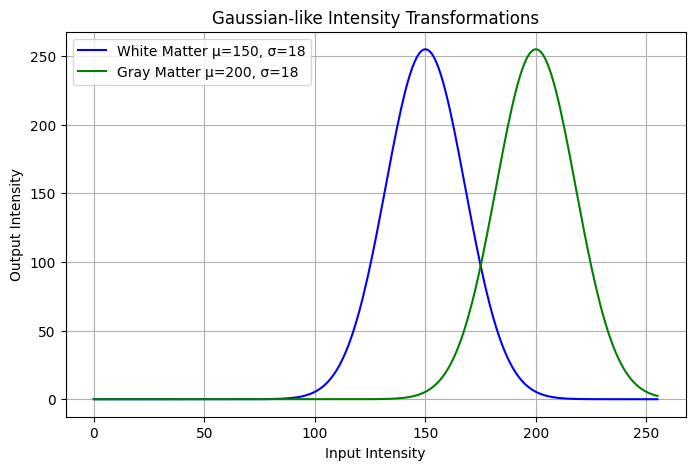

In [80]:
# Parameters
mu_wm, sigma_wm = 150, 18  # white matter
mu_gm, sigma_gm = 200, 18  # gray matter

# Intensity range
x = np.linspace(0, 255, 256)

# Gaussian transformation functions
T_wm = np.exp(-((x - mu_wm) ** 2) / (2 * sigma_wm ** 2))
T_gm = np.exp(-((x - mu_gm) ** 2) / (2 * sigma_gm ** 2))

# Normalize to 0-255
T_wm = (T_wm / T_wm.max()) * 255
T_gm = (T_gm / T_gm.max()) * 255

# Plot
plt.figure(figsize=(8, 5))
plt.plot(I, T_wm, label=f"White Matter μ={mu_wm}, σ={sigma_wm}", color='blue')
plt.plot(I, T_gm, label=f"Gray Matter μ={mu_gm}, σ={sigma_gm}", color='green')
plt.title("Gaussian-like Intensity Transformations")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.legend()
plt.grid(True)
plt.show()

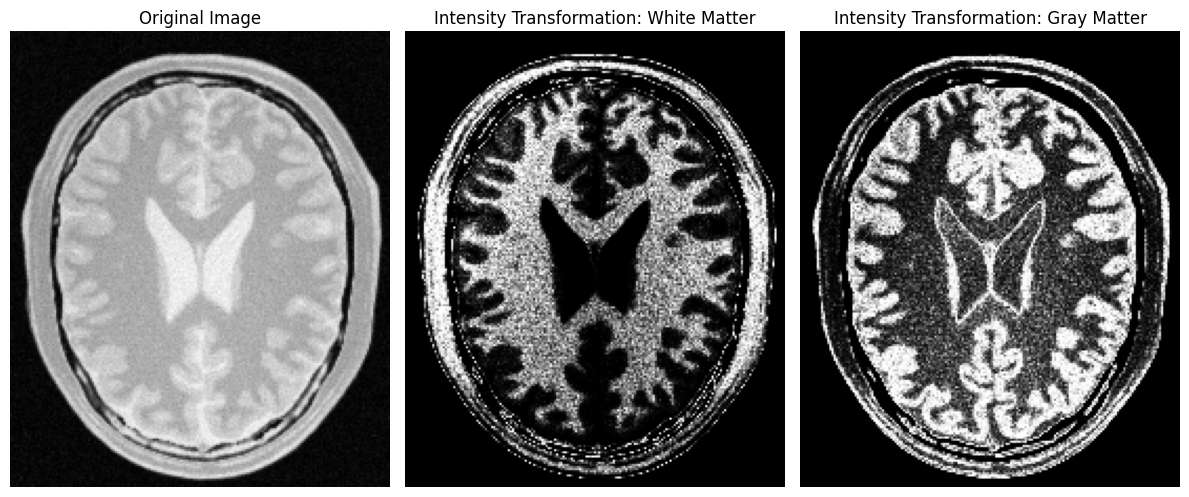

In [86]:
white_transform = T_wm[brain]
gray_transform =T_gm[brain]

# Display the images
fig, ax = plt.subplots(1, 3, figsize=(12,6))

ax[0].imshow(brain, cmap="gray")
ax[0].set_title('Original Image')
ax[0].axis("off")
ax[1].imshow(white_transform, cmap="gray")
ax[1].set_title('Intensity Transformation: White Matter')
ax[1].axis("off")
ax[2].imshow(gray_transform, cmap="gray")
ax[2].set_title('Intensity Transformation: Gray Matter')
ax[2].axis("off")

plt.tight_layout()
plt.show()